## Wine Quality Analysis - Visualizations

With thanks to this <a href="https://jovianlin.io/data-visualization-seaborn-part-1/">article</a> in which I learned many techniques using Seaborn.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
red_wine = pd.read_csv("winequality-red.csv", sep=';')
white_wine = pd.read_csv("winequality-white.csv", sep=';')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Feature Engineering

In [5]:
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [6]:
red_wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
white_wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white


Convert quality scores into a categorical data type of low, medium and high scores.

In [8]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])

In [9]:
red_wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [10]:
white_wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white,medium


In [11]:
print(red_wine['quality_label'].value_counts())
print("")
print(white_wine['quality_label'].value_counts())

medium    837
low       744
high       18
Name: quality_label, dtype: int64

medium    3078
low       1640
high       180
Name: quality_label, dtype: int64


### Merge Datasets

In [12]:
wines = pd.concat([red_wine, white_wine], axis=0,)

# Shuffle the records to randomise the data points
wines = wines.sample(frac=1.0, random_state=42).reset_index(drop=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [132]:
wines.shape

(6497, 14)

## Exploratory Data Analysis

Apply descriptive statistics on a subset of the attributes.

In [13]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 
                     'alcohol', 'volatile acidity', 'quality']

In [14]:
rs = round(red_wine[subset_attributes].describe(), 2)
rs

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,2.54,46.47,0.66,10.42,0.53,5.64
std,1.41,32.90,0.17,1.07,0.18,0.81
min,0.90,6.00,0.33,8.40,0.12,3.00
25%,1.90,22.00,0.55,9.50,0.39,5.00
50%,2.20,38.00,0.62,10.20,0.52,6.00
75%,2.60,62.00,0.73,11.10,0.64,6.00
max,15.50,289.00,2.00,14.90,1.58,8.00


In [15]:
ws = round(white_wine[subset_attributes].describe(), 2)
ws

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.39,138.36,0.49,10.51,0.28,5.88
std,5.07,42.50,0.11,1.23,0.10,0.89
min,0.60,9.00,0.22,8.00,0.08,3.00
25%,1.70,108.00,0.41,9.50,0.21,5.00
50%,5.20,134.00,0.47,10.40,0.26,6.00
75%,9.90,167.00,0.55,11.40,0.32,6.00
max,65.80,440.00,1.08,14.20,1.10,9.00


In [16]:
pd.concat([rs, ws], axis=1, keys = ['🔴 Red Wine Statistics', '⚪️ White Wine Statistics'])

🔴 Red Wine Statistics                                          \
             residual sugar total sulfur dioxide sulphates  alcohol   
count               1599.00              1599.00   1599.00  1599.00   
mean                   2.54                46.47      0.66    10.42   
std                    1.41                32.90      0.17     1.07   
min                    0.90                 6.00      0.33     8.40   
25%                    1.90                22.00      0.55     9.50   
50%                    2.20                38.00      0.62    10.20   
75%                    2.60                62.00      0.73    11.10   
max                   15.50               289.00      2.00    14.90   

                                ⚪️ White Wine Statistics                       \
      volatile acidity  quality           residual sugar total sulfur dioxide   
count          1599.00  1599.00                  4898.00              4898.00   
mean              0.53     5.64                     6.39               138.36   
std               0.18     0.81                     5.07                42.50   
min               0.12     3.00                     0.60                 9.00   
25%               0.39     5.00                     1.70               108.00   
50%               0.52     6.00                     5.20               134.00   
75%               0.64     6.00                     9.90               167.00   
max               1.58     8.00                    65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [17]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']

ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(), 2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(), 2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(), 2)

pd.concat([ls, ms, hs], axis=1, keys=['👎 Low Quality Wine', '👌 Medium Quality Wine', '👍 High Quality Wine'])

👎 Low Quality Wine                                     \
                 alcohol volatile acidity       pH  quality   
count            2384.00          2384.00  2384.00  2384.00   
mean                9.87             0.40     3.21     4.88   
std                 0.84             0.19     0.16     0.36   
min                 8.00             0.10     2.74     3.00   
25%                 9.30             0.26     3.11     5.00   
50%                 9.60             0.34     3.20     5.00   
75%                10.40             0.50     3.31     5.00   
max                14.90             1.58     3.90     5.00   

      👌 Medium Quality Wine                                     \
                    alcohol volatile acidity       pH  quality   
count               3915.00          3915.00  3915.00  3915.00   
mean                  10.81             0.31     3.22     6.28   
std                    1.20             0.14     0.16     0.45   
min                    8.40             0.08     2.72     6.00   
25%                    9.80             0.21     3.11     6.00   
50%                   10.80             0.27     3.21     6.00   
75%                   11.70             0.36     3.33     7.00   
max                   14.20             1.04     4.01     7.00   

      👍 High Quality Wine                                   
                  alcohol volatile acidity      pH quality  
count              198.00           198.00  198.00  198.00  
mean                11.69             0.29    3.23    8.03  
std                  1.27             0.12    0.16    0.16  
min                  8.50             0.12    2.88    8.00  
25%                 11.00             0.21    3.13    8.00  
50%                 12.00             0.28    3.23    8.00  
75%                 12.60             0.35    3.33    8.00  
max                 14.00             0.85    3.72    9.00

## Univariate Analysis

Visualizing the distribution of all numerical attributes.

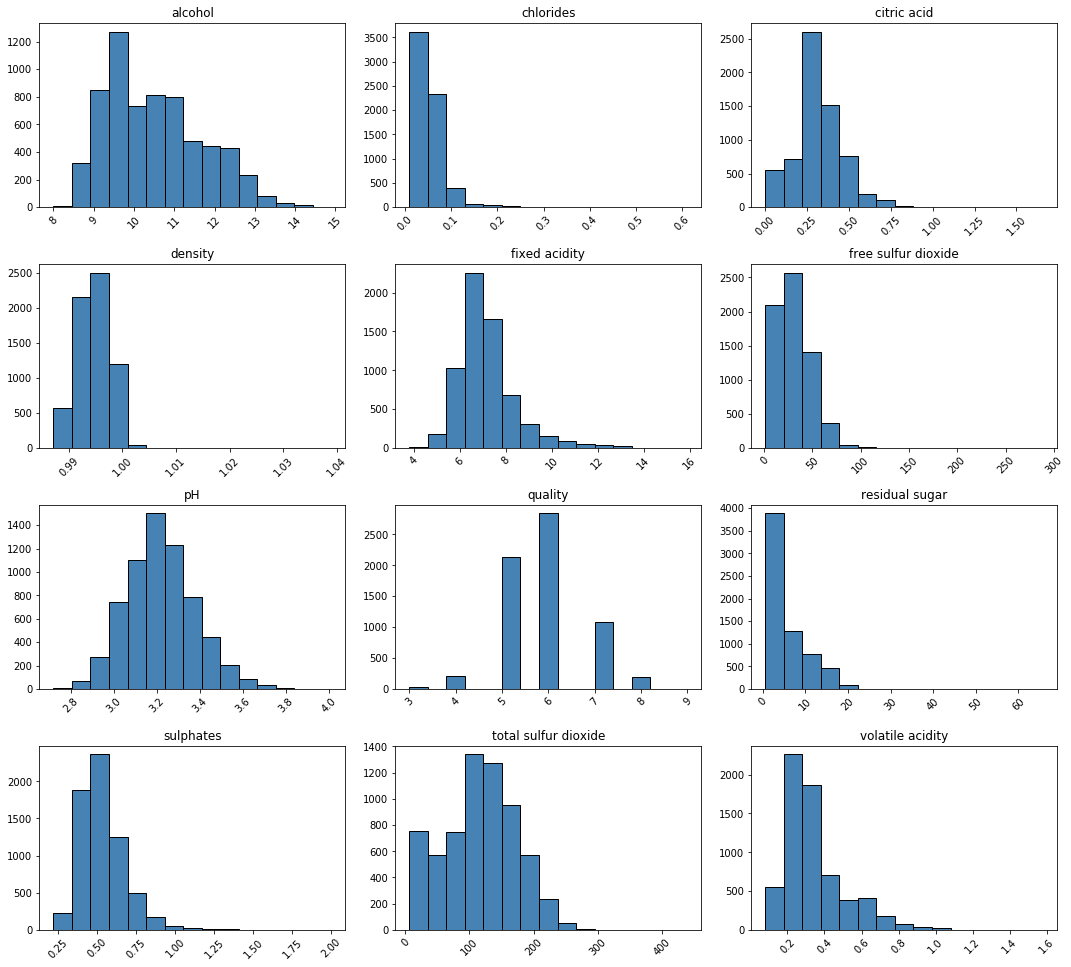

In [18]:
wines.hist(bins=15, color='steelblue', edgecolor='black', figsize=(10,9), grid=False,
           xrot=45, yrot=0, linewidth=1.0);
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

Focus in on sulphates using a kernal density estimation (kde) plot.

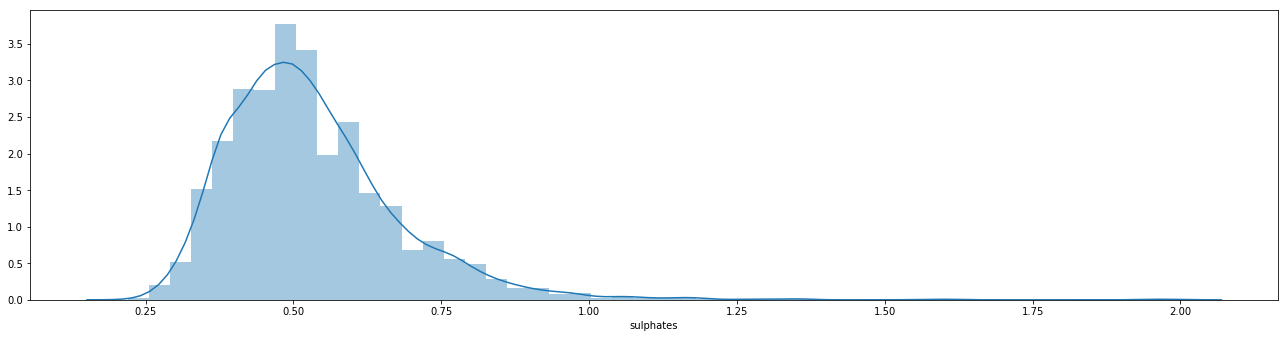

In [19]:
sns.distplot(wines['sulphates']);
plt.tight_layout(rect=(0,0,3,1.2))

Viewing categorical variables, quality scores and wine type.

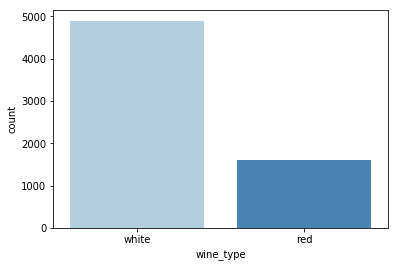

In [20]:
sns.countplot(wines['wine_type'], palette='Blues');

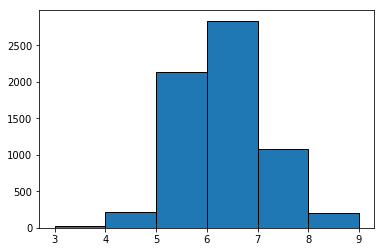

In [21]:
wines['quality'].hist(grid=False, bins=6, edgecolor='black');

## Correlation Mapping

In [22]:
corr = wines.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


Visualize this correlation in a heat map - to understand where the strong correlations are.

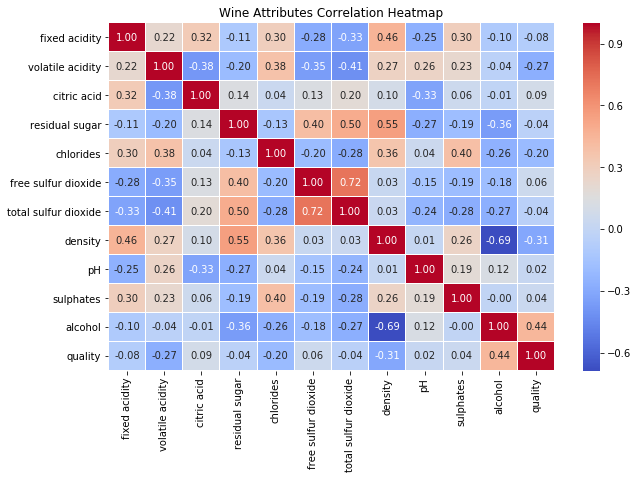

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt='.2f', linewidths=.05, ax=ax).set_title("Wine Attributes Correlation Heatmap")
fig.subplots_adjust(top=0.93)

Using pairwise scatter plots on variables of interest. Optional: add linear regression (kind="reg")

C:\Users\L.Spencer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


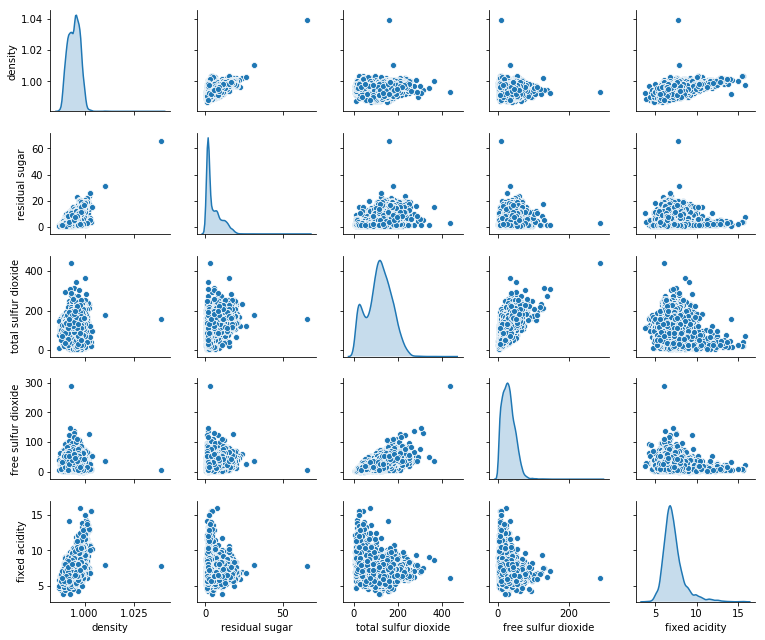

In [24]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'free sulfur dioxide', 'fixed acidity']
sns.pairplot(wines[cols], size=1.8, aspect=1.2, diag_kind="kde");

## Parallel Coordinates

Plotting multivariate relationships by scaling the data using StandardScaler. This standardizes features by removing the mean and scaling to unit variance.

In [25]:
# the attributes of interest
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'free sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

,density,residual sugar,total sulfur dioxide,free sulfur dioxide,fixed acidity,wine_type
0,-0.165631,1.546371,0.181456,-0.367664,-0.166089,white
1,0.301278,-0.681719,0.305311,0.083090,0.373895,red
2,-0.859324,0.411306,0.305311,0.421155,-0.320370,white
3,0.408001,1.210056,1.189993,1.717074,-0.706073,white
4,1.395180,1.777588,2.003900,1.829762,0.142473,white


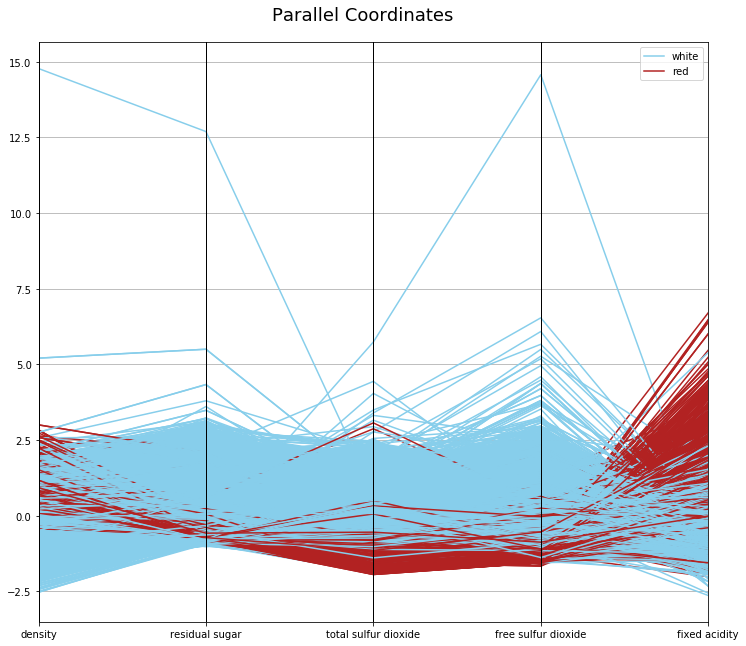

In [26]:
from pandas.plotting import parallel_coordinates

fig = plt.figure(figsize=(12, 10))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
fig.subplots_adjust(top=0.93, wspace=0)

pc = parallel_coordinates(final_df, 
                          'wine_type', 
                          color=('skyblue', 'firebrick'))

## Bivariate Analyses

Looking at continuous numeric attributes for direct comparison and bivariate analysis.

C:\Users\L.Spencer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


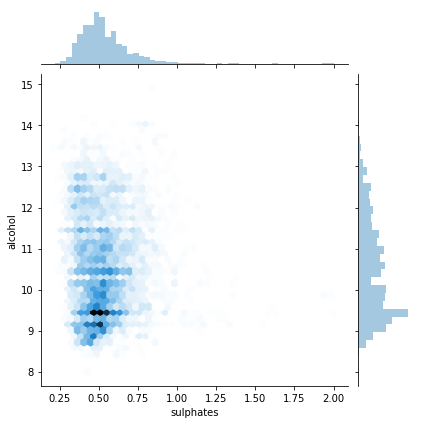

In [27]:
sns.jointplot(data=wines, x='sulphates', y='alcohol', size=6, kind='hex');

C:\Users\L.Spencer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


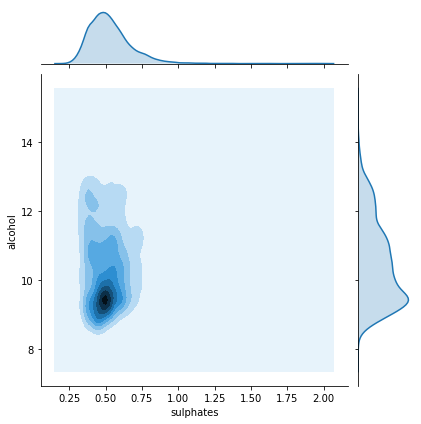

In [28]:
sns.jointplot(data=wines, x='sulphates', y='alcohol', kind='kde', size=6);

Analysing the quality scores of wine, across the two discrete categorical variables; red and white.

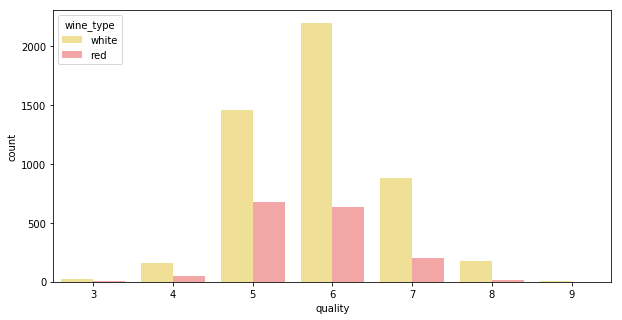

In [29]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=wines, x='quality', hue="wine_type", palette={"red": "#FF9999", "white": "#FFE888"});

Evaluating numerical and categorical together. When exploring relationships between two attributes conditioned on different levels of some variable - a FacetGrid is the best option.

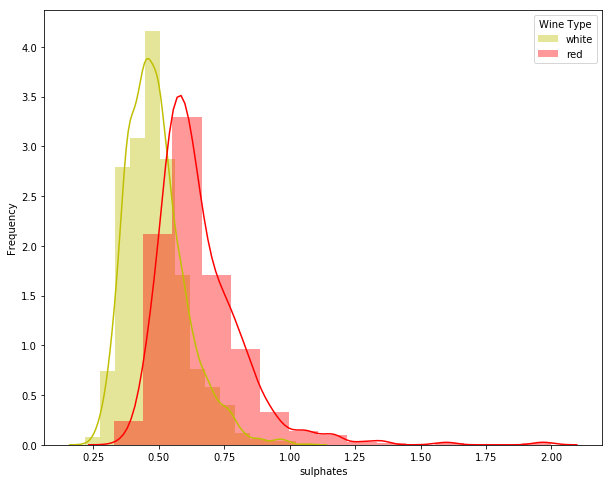

In [30]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

# displaying the number of sulphates in red vs white wine
g = sns.FacetGrid(data=wines, hue='wine_type', palette={"red": "r", "white": "y"})
g.map(sns.distplot, 'sulphates', kde=True, bins=15, ax=ax)

ax.legend(title='Wine Type')
plt.close(2)

Exploring wine quality based upon alcohol content (revealing!) using boxplots.

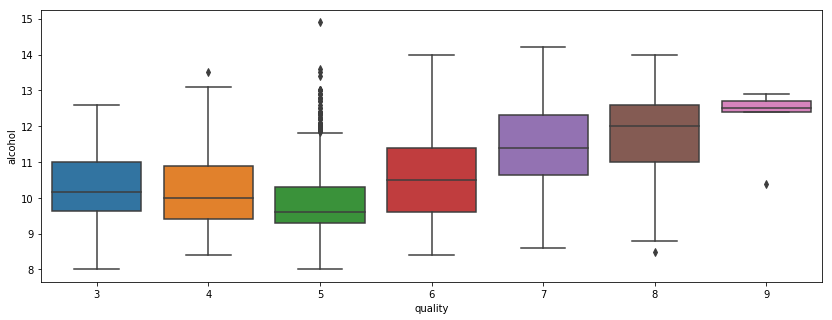

In [70]:
f, ax = plt.subplots(figsize=(14,5))
sns.boxplot(data=wines, x='quality', y='alcohol', ax=ax);

## 3D Visualization

The best way to go 3D or higher is using plot facets, color, shapes, sizes and depth.

C:\Users\L.Spencer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


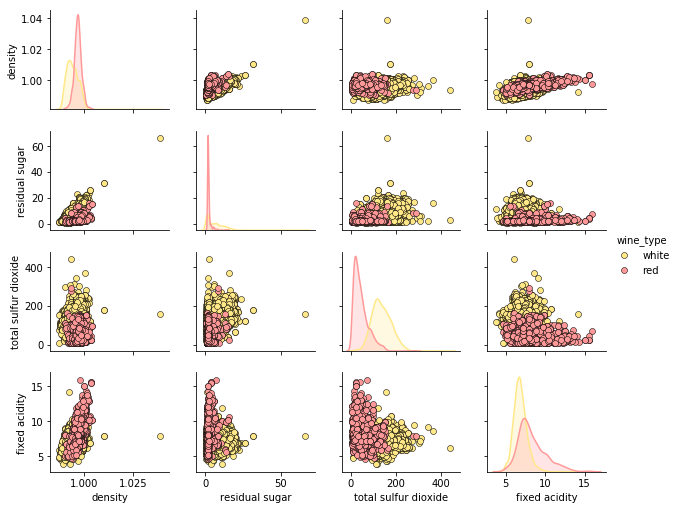

In [31]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
sns.pairplot(wines[cols], hue="wine_type", size=1.8, aspect=1.2, palette={'red': "#FF9999", 'white': "#FFE888"}, plot_kws=dict(edgecolor="black", linewidth=0.5));

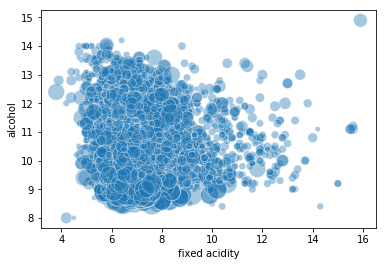

In [42]:
sns.scatterplot(x="fixed acidity", y='alcohol', s=wines['residual sugar']*25, alpha=0.4, data=wines);

Numerical and categorical variables combined analysis.

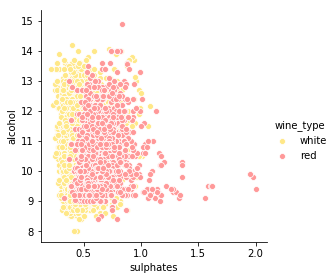

In [51]:
sns.pairplot(data=wines, x_vars='sulphates', y_vars='alcohol', hue='wine_type', height=4, palette={"red": "#FF9999", "white": "#FFE888"});

Fitting a linear regression model to a scatter plot.

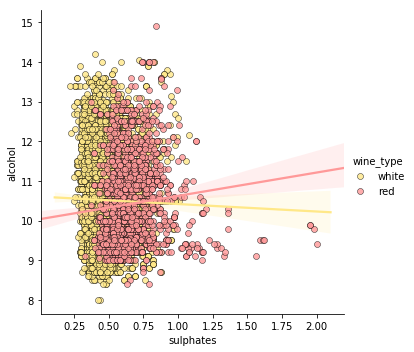

In [104]:
sns.lmplot(data=wines, x='sulphates', y='alcohol', hue='wine_type', 
           palette={'red': "#FF9999", 'white': "#FFE888"}, legend=True,
           scatter_kws=dict(edgecolor="k", linewidth=0.5));

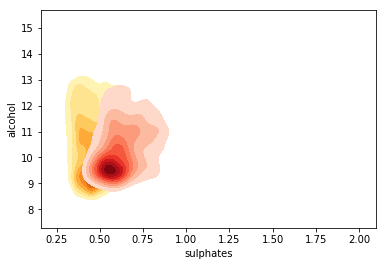

In [64]:
ax = sns.kdeplot(white_wine['sulphates'], white_wine['alcohol'], cmap="YlOrBr", shade=True, shade_lowest=False)
ax = sns.kdeplot(red_wine['sulphates'], red_wine['alcohol'], cmap="Reds", shade=True, shade_lowest=False)

For boxplots, we can split them for direct comparison of categorical variables.

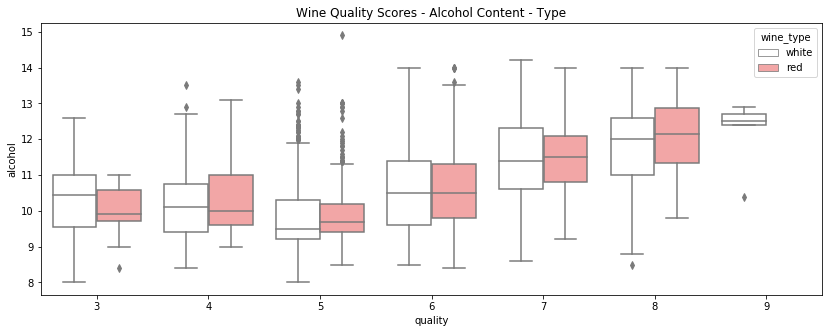

In [103]:
f, ax = plt.subplots(figsize=(14,5))
sns.boxplot(data=wines, x='quality', y='alcohol', hue='wine_type', palette={'red': '#FF9999','white': 'white'}, ax=ax);
plt.title("Wine Quality Scores - Alcohol Content - Type");

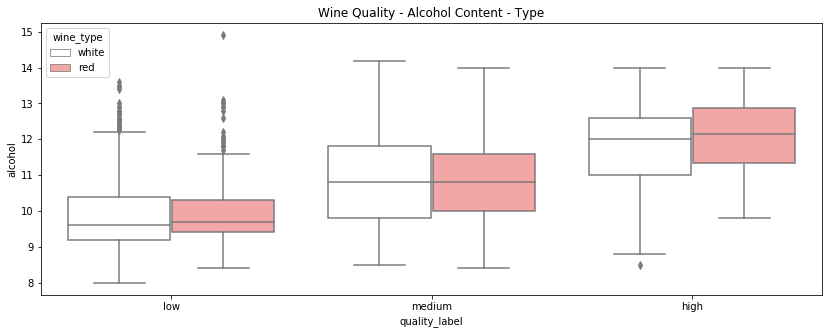

In [101]:
f, ax = plt.subplots(figsize=(14,5))
sns.boxplot(data=wines, x='quality_label', y='alcohol', hue='wine_type', palette={"red": "#FF9999", "white": "white"});
plt.title("Wine Quality - Alcohol Content - Type");

## 4D Visualizations

Factors here are: X-axis, Y-axis, Size and Colour.

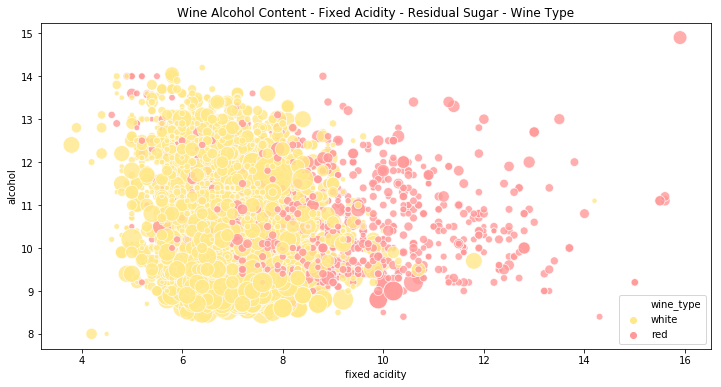

In [134]:
f,ax = plt.subplots(figsize=(12,6))
size = wines['residual sugar']*25;
sns.scatterplot(data=wines, x='fixed acidity', y="alcohol", s=size, hue="wine_type",
                legend='brief', palette={'red':'#FF9999','white':'#FFE888'}, 
                alpha=0.8, ax=ax);
plt.title("Wine Alcohol Content - Fixed Acidity - Residual Sugar - Wine Type");

Factors here are: X-axis, Y-axis, Size and n-Columns.

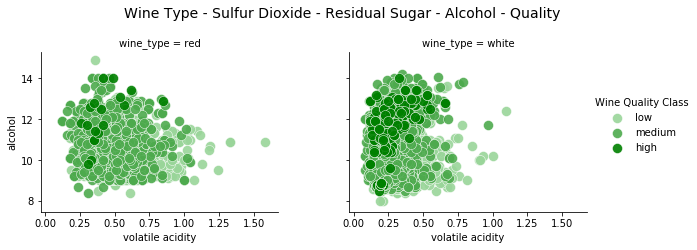

In [128]:
g = sns.FacetGrid(wines, 
                  col="wine_type",            
                  col_order=['red', 'white'], # Specify the labels
                  hue='quality_label',        
                  hue_order=['low', 'medium', 'high'],
                  aspect=1.2, 
                  height=3.5, 
                  palette=sns.light_palette('green', 4)[1:])

g.map(plt.scatter, 
      "volatile acidity",     # <== x-axis
      "alcohol", # <== y-axis
      alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100);

fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
g.add_legend(title='Wine Quality Class')

## 5D Visualizations

Factors here are: X-axis, Y-axis, Colour, n-Columns, and Size.

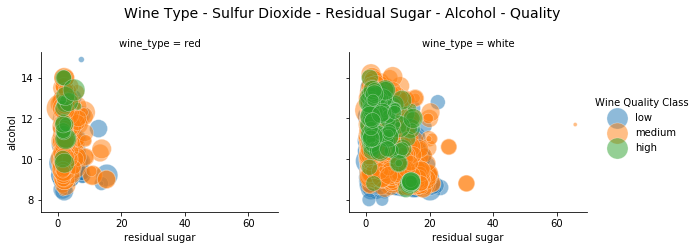

In [137]:
g = sns.FacetGrid (wines,
                   col="wine_type",
                   col_order=['red','white'],
                   hue='quality_label',
                   hue_order =['low','medium','high'],
                   aspect=1.2,
                   height=3.5)

g.map(plt.scatter, 'residual sugar', 'alcohol', alpha=0.5, edgecolor='white', linewidth=0.5,
      s=wines['total sulfur dioxide']*2); # <== Adjust the size

fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
g.add_legend(title='Wine Quality Class');